In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [270]:
df = pd.read_csv("../input/netflix-and-chill/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


<h2>EDA:</h2>

<h2>1. Compare the frequencies of the different types of shows in Netflix:</h2>

<AxesSubplot:xlabel='type'>

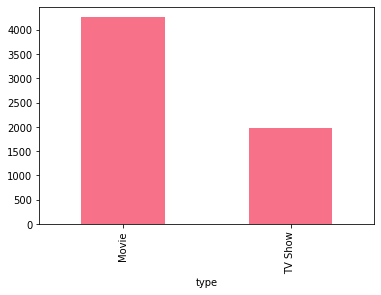

In [271]:
sns.set_palette("husl")
group_types = df.groupby(["type"]).count()["show_id"]
group_types.plot(kind="bar")

<AxesSubplot:ylabel='show_id'>

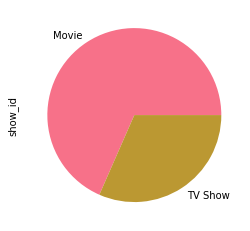

In [272]:
group_types.plot(kind="pie")

In [273]:
group_types

type
Movie      4265
TV Show    1969
Name: show_id, dtype: int64

<h4>We can deduce that the movie shows is more than half of the data (68%)</h4>

<h2>2. Show the relation between the years and the type of the show:</h2>

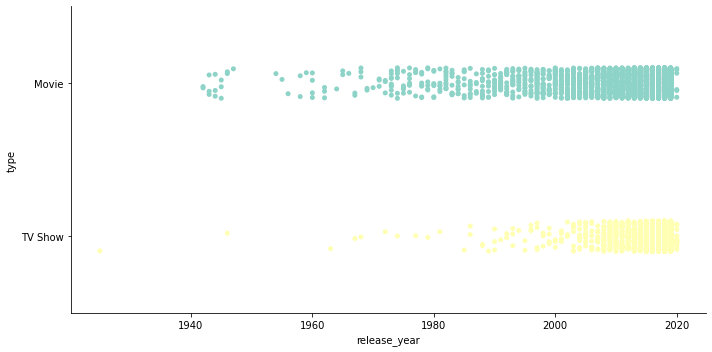

In [274]:
sns.set_palette("Set3")
sns.catplot(x="release_year", y="type", data=df, aspect=2)

<h4>Before the year 2000 the movies presence of movies in netflix was more than the TV Shows after that the frequencies of the Mobie shows and the TV shows are nearly</h4>

<h2>3. Show the relationship between the country and the rating of the movies based on the type</h2>

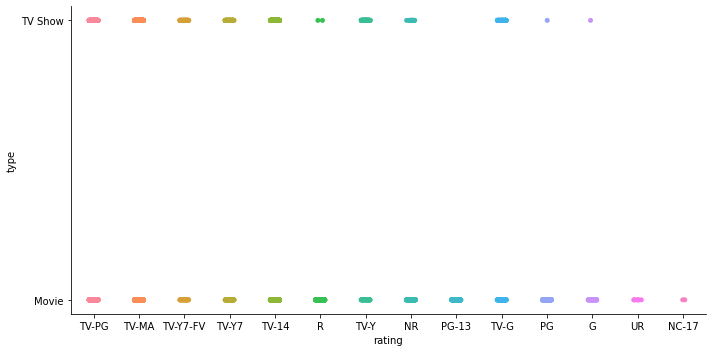

In [275]:
sns.catplot(x="rating", y="type", data=df, aspect=2)

<h4>We can deduce that there is no TV Show with rating PG-13, UR and NC-17 so netflix needs to add TV Shows with this rating to satisfy all there cutomers.</h4>

<h2>4. Show the percentage of shows sutable to kids:</h2>

In [276]:
kids_cnt = 0
for i in df["listed_in"]:
    if 'kids' in i or 'Children' in i:
        kids_cnt += 1
kids_cnt

378

<AxesSubplot:>

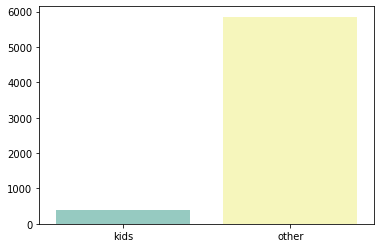

In [277]:
dic = {
    'kids': kids_cnt,
    'other': df.shape[0] - kids_cnt
}

sns.barplot(x=list(dic.keys()), y = list(dic.values()))

the percentage of kids shows: 

In [278]:
kids_cnt*100/df.shape[0]

6.063522617901829

<h4>So we can deduce that the kids shows percentage in netflix is 6% so netflix needs to increase the kids shows.</h4>

<h2>5. Check Which director has the greatest number of shows on netflix:</h2>

In [279]:
group_dir = df.groupby(["director"]).count()["show_id"]
group_dir

director
A. L. Vijay            2
A. Salaam              1
A.R. Murugadoss        3
Aadish Keluskar        1
Aamir Bashir           1
                      ..
Çagan Irmak            1
Ísold Uggadóttir       1
Óskar Thór Axelsson    1
Ömer Faruk Sorak       2
Şenol Sönmez           2
Name: show_id, Length: 3301, dtype: int64

<AxesSubplot:xlabel='director'>

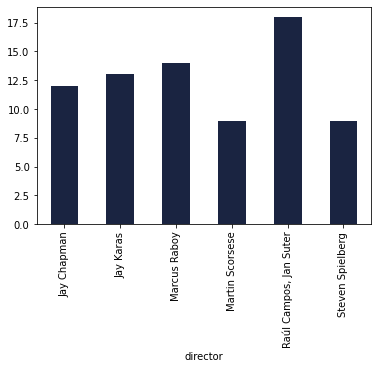

In [280]:
sns.set_palette("cubehelix")
group_dir[group_dir>=9].plot(kind="bar")

<h4>Raúl Campos, Jan Suter are the directors that have the greater number of shows on netflix.</h4>

<h2>6. Check the number of shows released during the years:</h2>

In [281]:
group_year = df.groupby(["release_year"]).count()["show_id"]
df["release_year"].value_counts()

2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1966       1
1959       1
1964       1
1925       1
1963       1
Name: release_year, Length: 72, dtype: int64

<AxesSubplot:xlabel='release_year'>

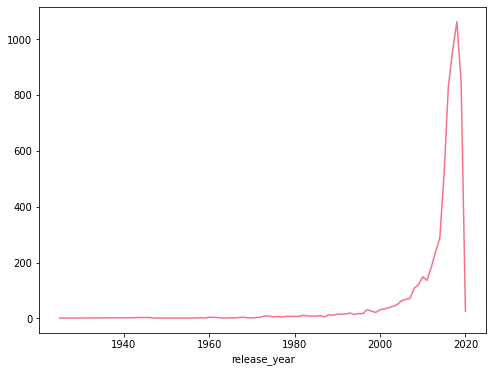

In [282]:
sns.set_palette("husl")
group_year.plot(kind="line", figsize=(8, 6))

<h4>We can deduce that there was an increase from year 2000 to year 2018 (It's peak) and begin to decrease until 2020</h4>

<h2>7. Check The Country that most produces shows:</h2>

In [283]:
group_country = df.groupby(["country"]).count()["show_id"]

<AxesSubplot:xlabel='country'>

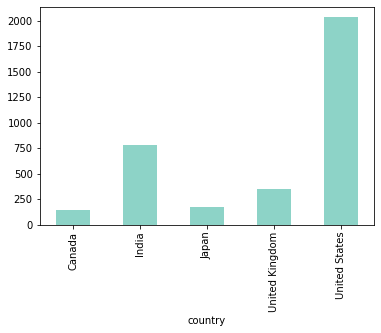

In [284]:
sns.set_palette("Set3")
group_country[group_country>=140].plot(kind="bar")

<h4>So we can deduce that the United States is the country with the most shows number on Netflix.</h4>

<h2>8. The relation between the rating and the release year of the show:</h2>

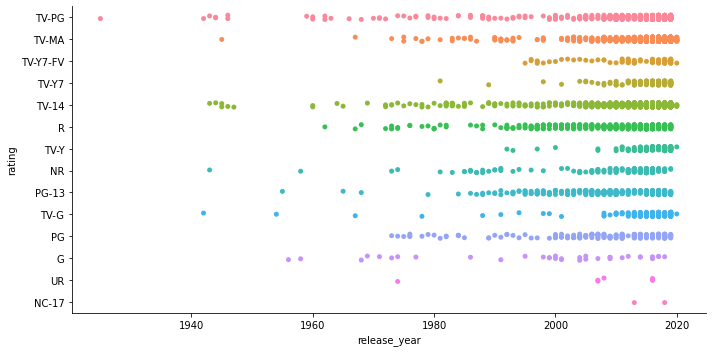

In [285]:
sns.catplot(x="release_year", y="rating", data=df, aspect=2)

<h4>Before the year 1980 there was no shows with rating TV-Y7-FV, TV-Y and NC-17</h4>

<h2>Time Series Analysis:</h2>

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [287]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [288]:
df_time = df.groupby(["date_added"]).count()["show_id"]
df_time = pd.DataFrame(df_time)
df_time


,show_id
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2020-01-14,4
2020-01-15,9
2020-01-16,10


In [289]:
df_time.rename({"show_id": "count_shows"} , axis = 1, inplace=True)

In [290]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1189 entries, 2008-01-01 to 2020-01-18
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   count_shows  1189 non-null   int64
dtypes: int64(1)
memory usage: 18.6 KB


<AxesSubplot:xlabel='date_added'>

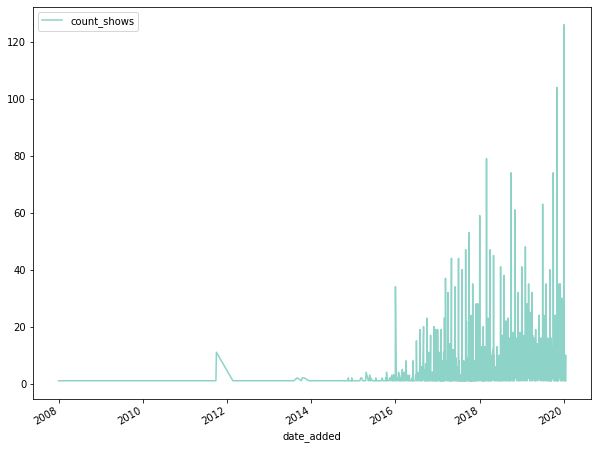

In [291]:
df_time.plot(kind="line", figsize=(10, 8))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='count_shows'>

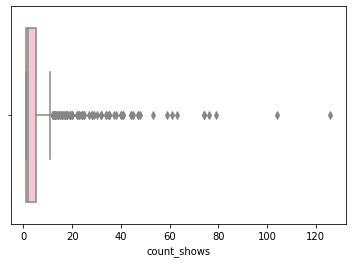

In [292]:
sns.boxplot(df_time['count_shows'] , color = "pink")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count_shows', ylabel='Density'>

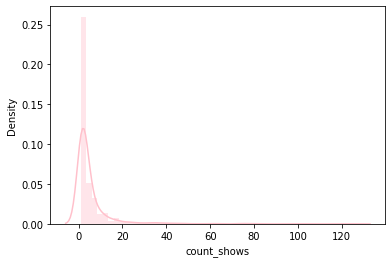

In [293]:
sns.distplot(df_time['count_shows'] , color = "pink")

In [294]:
def ACF_and_PACF(data):
  fig = plt.figure(figsize=(17,10))
  ax1 = fig.add_subplot(211)
  fig = plot_acf(data , lags = 30 , ax = ax1)
  ax2 = fig.add_subplot(212)
  fig = plot_pacf(data , lags = 30 , ax = ax2)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


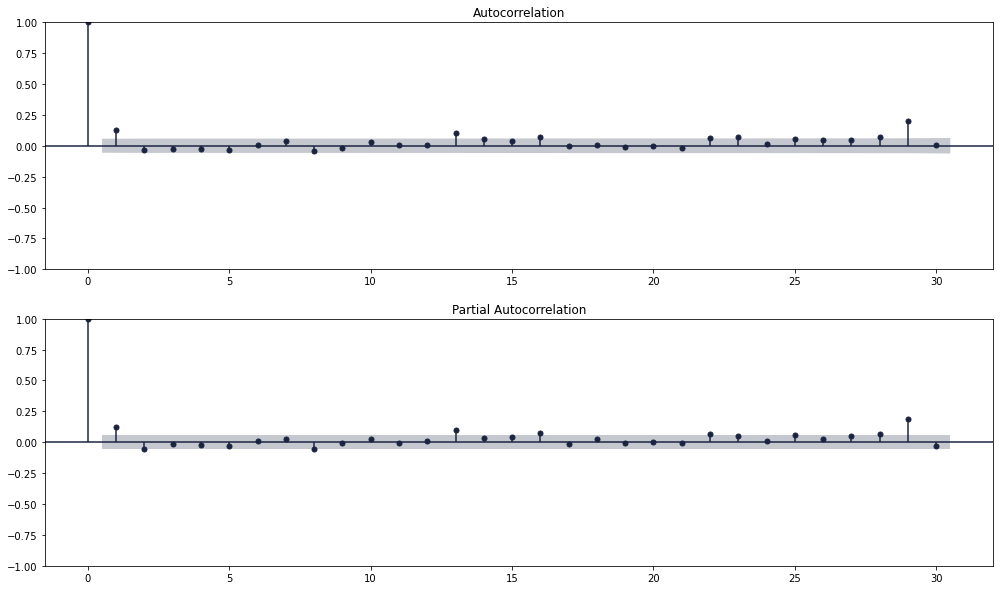

In [295]:
sns.set_palette("cubehelix")
ACF_and_PACF(df_time['count_shows'])

In [296]:
#Determine Rolling statistics
rolmean = df_time.rolling(window= 12).mean()
rolstd = df_time.rolling(window= 12).std()

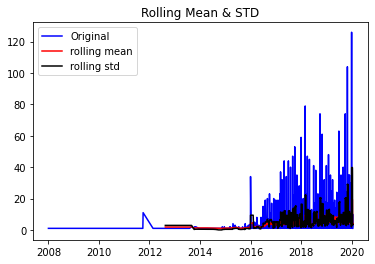

In [297]:
orig = plt.plot(df_time , color = "blue" , label = "Original")
mean = plt.plot(rolmean , color = "red" , label = "rolling mean")
std = plt.plot(rolstd , color = "black" , label = "rolling std")
plt.legend(loc = "best")
plt.title ("Rolling Mean & STD")
plt.show()

In [298]:
print("Results of Dickey Fuller Test: ")
dftest = adfuller(df_time['count_shows'] , autolag= "AIC")

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test: 
Test Statistic                -6.840042e+00
p-value                        1.800968e-09
#Lags Used                     1.500000e+01
Number of Observations Used    1.173000e+03
Critical Value (1%)           -3.435937e+00
Critical Value (5%)           -2.864007e+00
Critical Value (10%)          -2.568084e+00
dtype: float64


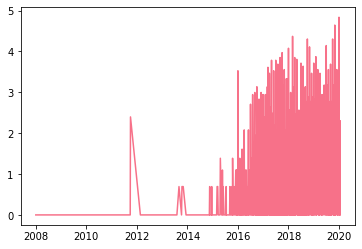

In [299]:
#estimating trend
sns.set_palette("husl")
df_logScale = np.log(df_time)
plt.plot(df_logScale)

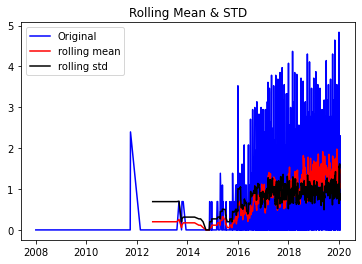

In [300]:
#plot rolling statistics
orig = plt.plot(df_logScale , color = "blue" , label = "Original")
mean = plt.plot(df_logScale.rolling(window=12).mean() , color = "red" , label = "rolling mean")
std = plt.plot(df_logScale.rolling(window=12).std() , color = "black" , label = "rolling std")
plt.legend(loc = "best")
plt.title ("Rolling Mean & STD")
plt.show()

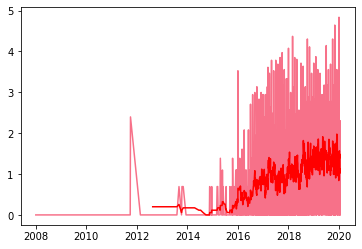

In [301]:
#The below transformation is required to make series stationary
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')

In [302]:
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,count_shows
date_added,
2012-08-17,-0.199825
2012-10-24,-0.199825
2012-11-14,-0.199825
2012-12-01,-0.199825
2013-03-31,-0.199825
2013-04-01,-0.199825
2013-08-02,-0.199825
2013-09-01,0.435560
2013-10-08,-0.057762


In [303]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['count_shows'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

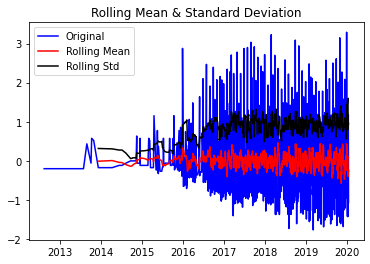

Results of Dickey Fuller Test:
Test Statistic                -1.210129e+01
p-value                        2.015569e-22
#Lags Used                     2.300000e+01
Number of Observations Used    1.154000e+03
Critical Value (1%)           -3.436029e+00
Critical Value (5%)           -2.864048e+00
Critical Value (10%)          -2.568105e+00
dtype: float64


In [304]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [305]:
data = datasetLogScaleMinusMovingAverage.dropna()
data

,count_shows
date_added,
2012-08-17,-0.199825
2012-10-24,-0.199825
2012-11-14,-0.199825
2012-12-01,-0.199825
2013-03-31,-0.199825
...,...
2020-01-14,0.146189
2020-01-15,1.177040
2020-01-16,1.182070


In [306]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [307]:
train = data[:942]
test = data[942:]

<h3>AR Model:</h3>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26635D+00    |proj g|=  2.35486D-03


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   1.064D-06   1.266D+00
  F =   1.2663513472285435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:            count_shows   No. Observations:                  942
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1192.903
Date:                Wed, 28 Sep 2022   AIC                           2391.806
Time:                        14:30:45   BIC                           2406.350
Sample:                     

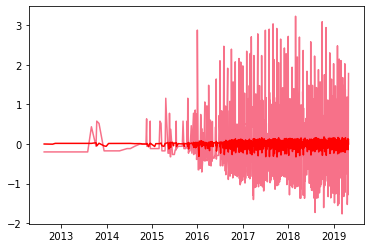

In [308]:
#AR MODEL
model_ar = SARIMAX(train , order= (2,0,0))
res_ar = model_ar.fit()
plt.plot(train)
plt.plot(res_ar.fittedvalues, color = "red")
print(res_ar.summary())

<h3>MA Model:</h3>

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26524D+00    |proj g|=  6.31086D-03

At iterate    5    f=  1.26521D+00    |proj g|=  2.50284D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   2.503D-06   1.265D+00
  F =   1.2652084359128908     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:            count_shows   No. Observati

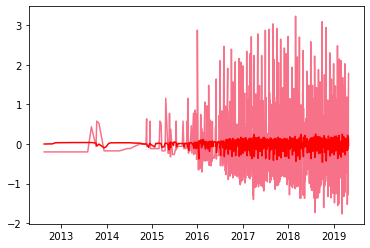

In [309]:
#MA MODEL
model_ma = SARIMAX(train , order= (0,0,2))
res_ar = model_ma.fit()
plt.plot(train)
plt.plot(res_ar.fittedvalues, color = "red")
print(res_ar.summary())

<h3>ARMA Model</h3>

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87411D+00    |proj g|=  1.47919D+00

At iterate    5    f=  1.31107D+00    |proj g|=  2.61507D-01

At iterate   10    f=  1.25462D+00    |proj g|=  3.35619D-02

At iterate   15    f=  1.22625D+00    |proj g|=  5.40267D-02

At iterate   20    f=  1.22431D+00    |proj g|=  4.73108D-03

At iterate   25    f=  1.22134D+00    |proj g|=  3.02330D-03

At iterate   30    f=  1.22131D+00    |proj g|=  2.38612D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

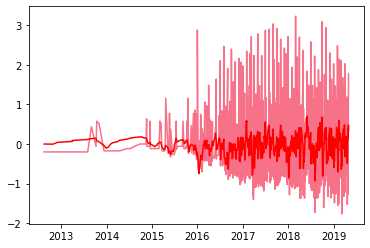

In [310]:
#ARMA MODEL
model_arma = SARIMAX(train , order= (2,0,2))
res_ar = model_arma.fit()
plt.plot(train)
plt.plot(res_ar.fittedvalues, color = "red")
print(res_ar.summary())

<h3>ARIMA Model</h3>

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68795D+00    |proj g|=  7.43416D-01

At iterate    5    f=  1.30107D+00    |proj g|=  8.86115D-02

At iterate   10    f=  1.27584D+00    |proj g|=  8.33546D-03

At iterate   15    f=  1.27442D+00    |proj g|=  4.88255D-03

At iterate   20    f=  1.27429D+00    |proj g|=  9.84339D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   9.843D-06   1.274D+00
  F =   1.2742854913465393     

CONVERG

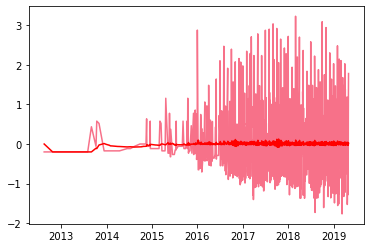

In [311]:
#ARIMA MODEL
model_arima = SARIMAX(train , order= (2,1,2))
res_ar = model_arima.fit()
plt.plot(train)
plt.plot(res_ar.fittedvalues, color = "red")
print(res_ar.summary())